In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

### Задача 1
Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

#### Решение:

In [2]:
std = 16
n = 256
mean = 80
p = 0.95
alpha = 1 - p
t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)
(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(78.0306894301508, 81.9693105698492)

#### Ответ:
(78.0306894301508, 81.9693105698492)

### Задача 2
Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально.
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
2. Найдите P-значение для данного теста.

#### Решение:
Нулевая гипотеза: средний вес пачки печенья равен 200 г. (т.е. утверждение продавца верно). Альтернативная гипотеза - средний вес пачки печенья не равен 200 г.
Т.к. известно, что веса пачек распределены нормально, то берем нормальное распределение. Поскольку дисперсия неизвестна, то используем t-статистику.
Уровень значимости 0.01

In [3]:
alpha = 0.01
mu = 200
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])

def statistic(samples):
    return (samples.mean() - mu) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

n = samples.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-3.24983554401537, 3.2498355440153697)

Критическая область:
$$\Omega_\alpha = (-\infty, -3.25) \cup (3.25, \infty)$$

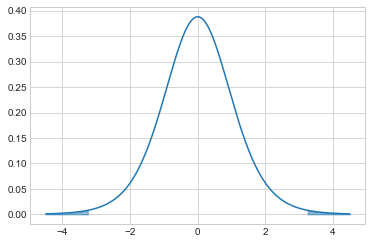

In [4]:
ox = np.linspace(-4.5, 4.5, 1000)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4.5, t1, 300)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4.5, 300)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

In [5]:
z = statistic(samples)
z

-1.0651074037450896

In [6]:
p_left = stats.t.cdf(z, df=n - 1)
p_right = 1 - stats.t.cdf(z, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

0.31456660352472854

#### Ответ:
Значение не попало в критическую область; p-value больше уровня значимости - нулевая гипотеза принимается. Т.е. утверждение продавца верно.

### Задача 3
Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

#### Решение:
Нулевая гипотеза: средний диаметр шариков 17 мм.
Альтернативная гипотеза: средний диаметр шариков не равен 17 мм.
Т.к. дисперсия известна, то используем Z-статистику.
Уровень значимости 0.025 или 2.5%.

In [7]:
mu = 17
alpha = 0.025
n = 100
mean = 17.5
std = 4

In [8]:
z = (mean - mu) / (std / n ** 0.5)
z

1.25

In [9]:
t = stats.norm.ppf(1 - alpha)
t

1.959963984540054

Итак, правосторонняя критическая область:
$$\Omega_\alpha = (1.96, \infty)$$

In [10]:
p_right = 1 - stats.t.cdf(z, df=n - 1)
p_right

0.10712316878419326

#### Ответ:
Значение z-статистики не попало в правостороннюю критическую область. Уровень значимости меньше правостороннего p-value. Значит, нулевая гипотеза принимается.

### Задача 4
Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

#### Решение:
Нулевая гипотеза - дисперсия диаметра шариков равна 0.0625
Альтернативная гипотеза - дисперсия диаметра шариков подшипников не равна 0.0625
Статистика H. Распределение хи-квадрат.
Уровень значимости 0.05

In [11]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])
alpha = 0.05
variance = 0.0625
df = samples.shape[0] - 1

In [12]:
def statistic(samples, variance):
    return (samples.shape[0] - 1) * samples.var() / variance

In [13]:
t1 = stats.chi2.ppf(alpha / 2, df)
t2 = stats.chi2.ppf(1 - alpha / 2, df)

t1, t2

(11.688551922452438, 38.0756272503558)

Итак, критическая область:
$$\Omega_\alpha = (-\infty, 11.69) \cup (38.08, \infty)$$

In [14]:
H = statistic(samples, variance)
H

27.523852513611114

#### Ответ:
Статистика не попадает в критическую область, значит, нулевая гипотеза принимается.